In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
mapping_df = pd.read_csv('region_mapping.csv', header=None)
list_of_ac = mapping_df[0].tolist()
list_of_full = mapping_df[1].tolist()
countries = list(zip(list_of_ac, list_of_full))
countries

[('ar', 'Argentina'),
 ('at', 'Austria'),
 ('au', 'Australia'),
 ('be', 'Belgium'),
 ('bo', 'Bolivia'),
 ('br', 'Brazil'),
 ('ca', 'Canada'),
 ('ch', 'Switzerland'),
 ('cl', 'Chile'),
 ('co', 'Colombia'),
 ('cr', 'Costa Rica'),
 ('cz', 'Czechia'),
 ('de', 'Gernmany'),
 ('dk', 'Denmark'),
 ('do', 'Dominican Republic'),
 ('ec', 'Ecuador'),
 ('ee', 'Estonia'),
 ('es', 'Spain'),
 ('fi', 'Finland'),
 ('fr', 'France'),
 ('gb', 'United Kingdom'),
 ('gr', 'Greece'),
 ('gt', 'Guatemala'),
 ('hk', 'HongKong'),
 ('hn', 'Honduras'),
 ('hu', 'Hungary'),
 ('id', 'Indonesia'),
 ('ie', 'Ireland'),
 ('il', 'Israel'),
 ('is', 'Iceland'),
 ('it', 'Italy'),
 ('jp', 'Japan'),
 ('lt', 'Lithuania'),
 ('lu', 'Luxembourg'),
 ('lv', 'Latvia'),
 ('mt', 'Malta'),
 ('mx', 'Mexico'),
 ('my', 'Malaysia'),
 ('ni', 'Nicaragua'),
 ('nl', 'Netherlands'),
 ('no', 'Norway'),
 ('nz', 'New Zealand'),
 ('pa', 'Panama'),
 ('pe', 'Peru'),
 ('ph', 'Philippines'),
 ('pl', 'Poland'),
 ('pt', 'Portugal'),
 ('py', 'Paraguay'),
 ('r

In [3]:
# df = pd.DataFrame()
# for country in countries:
#     file_name = 'data/' + country[0] + '.csv'
#     temp = pd.read_csv(file_name)
#     famous_song_series = temp['Track Name'].value_counts()[:100]
#     famous_song_df = pd.DataFrame({'Name': famous_song_series.index, 'Country': country[1]})
#     df = df.append(famous_song_df)
# df

,Name,Country
0,Me Gusta,Argentina
1,Spaghetti del Rock,Argentina
2,Creo,Argentina
3,Crimen,Argentina
4,Track Name,Argentina
...,...,...
95,Way Back Home,Vietnam
96,Better Now,Vietnam
97,Mượn Rượu Tỏ Tình,Vietnam
98,DDU-DU DDU-DU,Vietnam


In [84]:
df_rank = pd.DataFrame()
for country in countries:
    file_name = 'total_rank_data/' + country[0] + '.csv'
    temp = pd.read_csv(file_name)
    famous_song_series = temp[['Track Name', 'spotify_id']][:100]
    famous_song_df = pd.DataFrame({'Name': famous_song_series['Track Name'],\
                                   'spotify_id': famous_song_series['spotify_id'],
                                   'Country': country[1]})
    df_rank = df_rank.append(famous_song_df)
df_rank.head()

,Name,spotify_id,Country
0,Crimen,3oqWr0jDWNXxWufNogGREp,Argentina
1,Creo,5Bi9Cq5oVFy1OtUgecbegZ,Argentina
2,Spaghetti del Rock,6rg1MBZqggsQ5olFGTw0rr,Argentina
3,Nunca quise,0ZAJ660VP57lLK4U7NlGOy,Argentina
4,Me Gusta,3pMo77B4r1NwwIK78lO4xf,Argentina


In [85]:
df_rank = df_rank.reset_index()
df_rank = df_rank.rename(columns = {'index':'rank'})
df_rank.head()

,rank,Name,spotify_id,Country
0,0,Crimen,3oqWr0jDWNXxWufNogGREp,Argentina
1,1,Creo,5Bi9Cq5oVFy1OtUgecbegZ,Argentina
2,2,Spaghetti del Rock,6rg1MBZqggsQ5olFGTw0rr,Argentina
3,3,Nunca quise,0ZAJ660VP57lLK4U7NlGOy,Argentina
4,4,Me Gusta,3pMo77B4r1NwwIK78lO4xf,Argentina


In [53]:
country_matrix_rank = pd.DataFrame(columns=[country[1] for country in countries])
country_matrix_rank

,Argentina,Austria,Australia,Belgium,Bolivia,Brazil,Canada,Switzerland,Chile,Colombia,...,Sweden,Singapore,Slovakia,El Salvador,Thailand,Turkey,Taiwan,United States,Uruguay,Vietnam


In [54]:
for country in countries:
    score_list = []
    current_temp = df_rank[df_rank['Country'] == country[1]]
    for counterparty in country_matrix_rank.iteritems():
        counterparty_temp = df_rank[df_rank['Country'] == counterparty[0]]
        temp = counterparty_temp.merge(current_temp, left_on='Name', right_on='Name')
        score_list.append(len(temp)/len(current_temp))
    country_matrix_rank.loc[country[1]] = score_list
country_matrix_rank

,Argentina,Austria,Australia,Belgium,Bolivia,Brazil,Canada,Switzerland,Chile,Colombia,...,Sweden,Singapore,Slovakia,El Salvador,Thailand,Turkey,Taiwan,United States,Uruguay,Vietnam
Argentina,1.000000,0.080000,0.090000,0.10000,0.570000,0.060000,0.080000,0.10000,0.560000,0.450000,...,0.090000,0.100000,0.070000,0.520000,0.060000,0.030000,0.080000,0.030000,0.720000,0.08000
Austria,0.080000,1.000000,0.420000,0.57000,0.090000,0.090000,0.370000,0.60000,0.070000,0.080000,...,0.460000,0.260000,0.430000,0.140000,0.140000,0.070000,0.160000,0.250000,0.060000,0.23000
Australia,0.090000,0.420000,1.020000,0.58000,0.110000,0.140000,0.660000,0.49000,0.100000,0.110000,...,0.460000,0.360000,0.400000,0.180000,0.220000,0.080000,0.210000,0.520000,0.070000,0.25000
Belgium,0.100000,0.570000,0.580000,1.02000,0.120000,0.130000,0.470000,0.70000,0.100000,0.140000,...,0.510000,0.410000,0.530000,0.210000,0.210000,0.100000,0.220000,0.330000,0.100000,0.31000
Bolivia,0.570000,0.090000,0.110000,0.12000,1.000000,0.080000,0.100000,0.13000,0.570000,0.630000,...,0.090000,0.130000,0.090000,0.710000,0.090000,0.050000,0.080000,0.070000,0.660000,0.10000
Brazil,0.060000,0.090000,0.140000,0.13000,0.080000,1.000000,0.120000,0.11000,0.040000,0.060000,...,0.110000,0.130000,0.100000,0.100000,0.080000,0.060000,0.080000,0.090000,0.060000,0.12000
Canada,0.080000,0.370000,0.660000,0.47000,0.100000,0.120000,1.000000,0.45000,0.080000,0.120000,...,0.370000,0.310000,0.370000,0.180000,0.200000,0.100000,0.200000,0.790000,0.070000,0.23000
Switzerland,0.100000,0.600000,0.490000,0.70000,0.130000,0.110000,0.450000,1.02000,0.110000,0.120000,...,0.510000,0.330000,0.510000,0.200000,0.160000,0.100000,0.190000,0.320000,0.100000,0.26000
Chile,0.560000,0.070000,0.100000,0.10000,0.570000,0.040000,0.080000,0.11000,1.000000,0.530000,...,0.080000,0.070000,0.040000,0.550000,0.050000,0.040000,0.070000,0.050000,0.560000,0.05000
Colombia,0.450000,0.080000,0.110000,0.14000,0.630000,0.060000,0.120000,0.12000,0.530000,1.000000,...,0.090000,0.130000,0.080000,0.630000,0.070000,0.050000,0.100000,0.070000,0.470000,0.09000


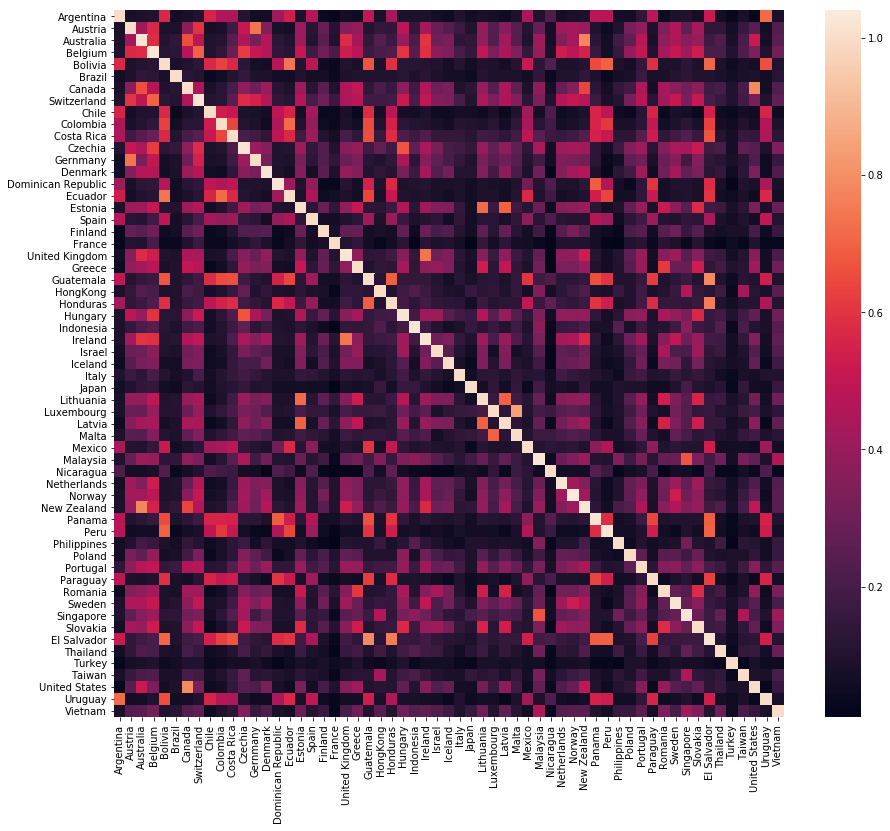

In [23]:
plt.figure(figsize = (15,13))
sns.heatmap(country_matrix_rank)

In [7]:
for country in countries:
    score_list = []
    current_temp = df[df['Country'] == country[1]]
    for counterparty in country_matrix.iteritems():
        counterparty_temp = df[df['Country'] == counterparty[0]]
        temp = counterparty_temp.merge(current_temp, left_on='Name', right_on='Name')
        score_list.append(len(temp)/len(current_temp))
    country_matrix.loc[country[1]] = score_list
country_matrix

NameError: name 'country_matrix' is not defined

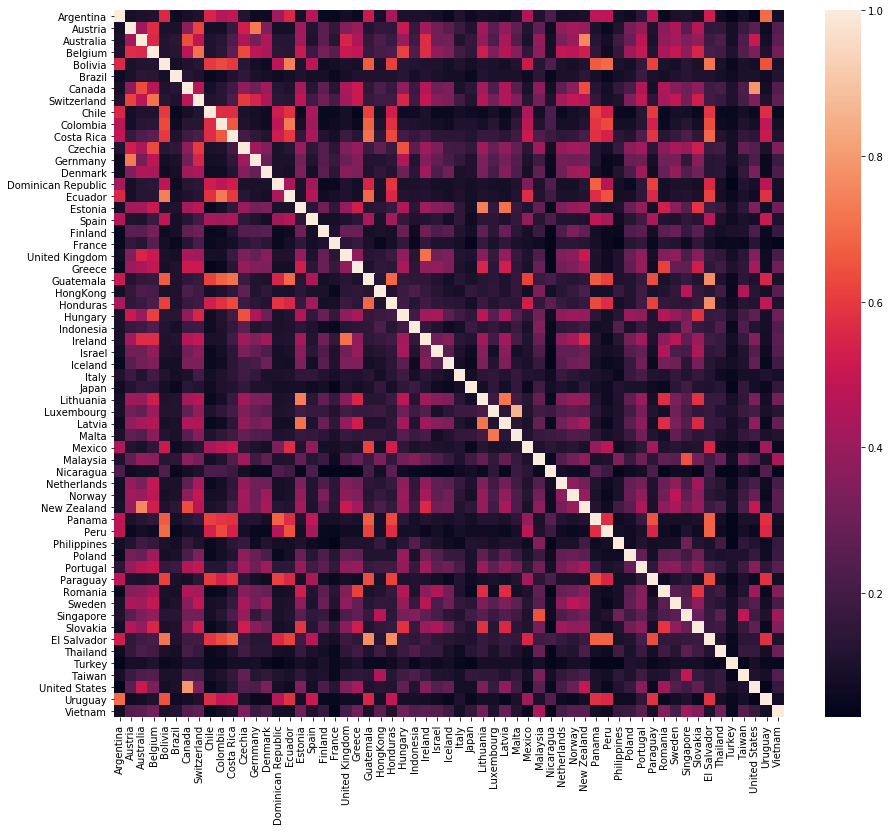

In [25]:
plt.figure(figsize = (15,13))
sns.heatmap(country_matrix)

In [31]:
country_matrix['Belgium']

Argentina             0.110000
Austria               0.570000
Australia             0.550000
Belgium               1.000000
Bolivia               0.120000
Brazil                0.130000
Canada                0.460000
Switzerland           0.700000
Chile                 0.110000
Colombia              0.140000
Costa Rica            0.260000
Czechia               0.630000
Gernmany              0.500000
Denmark               0.430000
Dominican Republic    0.140000
Ecuador               0.130000
Estonia               0.480000
Spain                 0.180000
Finland               0.310000
France                0.240000
United Kingdom        0.500000
Greece                0.470000
Guatemala             0.170000
HongKong              0.210000
Honduras              0.220000
Hungary               0.610000
Indonesia             0.230000
Ireland               0.560000
Israel                0.370000
Iceland               0.330000
Italy                 0.190000
Japan                 0.150000
Lithuani

In [33]:
df[df['Country'] == 'Luxembourg']

,Name,Country
0,Shape of You,Luxembourg
1,Track Name,Luxembourg
2,Despacito (Featuring Daddy Yankee),Luxembourg
3,Something Just Like This,Luxembourg
4,Mask Off,Luxembourg
...,...,...
79,How Would You Feel (Paean),Luxembourg
80,Let Me Love You,Luxembourg
81,Selfish (feat. Rihanna),Luxembourg
82,The One,Luxembourg


df_rank.head(10)

# Clustering

In [8]:
# label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [9]:
le.fit(list(df_rank['Name']))

LabelEncoder()

In [10]:
df_rank['Label Encoder'] = le.transform(df_rank['Name'])

In [11]:
df_rank.head()

,Name,Country,Label Encoder
0,Crimen,Argentina,353
1,Creo,Argentina,351
2,Spaghetti del Rock,Argentina,1505
3,Nunca quise,Argentina,1146
4,Me Gusta,Argentina,984


In [12]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

In [13]:
ohe_features = enc.fit_transform(np.array(df_rank['Name']).reshape(-1,1)).toarray()

In [14]:
df_ohe = pd.DataFrame(ohe_features)

In [15]:
df_ohe['Country'] = df_rank.reset_index()['Country']

In [16]:
# sum ohe features by country
df_ohe = df_ohe.groupby('Country').sum()

In [17]:
df_ohe.head()

,0,1,2,3,4,5,6,7,8,9,...,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Austria,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bolivia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init=1000, random_state = 0)
kmeans.fit_transform(df_ohe)

array([[11.34258881,  7.11182993, 11.103209  , 10.26294914, 11.82433147],
       [ 6.6490508 , 11.65453238,  9.63230242,  9.92865172,  8.77707451],
       [ 7.17935999, 11.76129776, 10.29714766,  9.86550176,  8.81497043],
       [ 6.19039479, 11.42160781,  9.5279195 ,  9.38499467,  7.7983854 ],
       [11.19468569,  5.50709769, 10.91014436, 10.12808595, 11.60619247],
       [11.20460664, 11.97197248, 10.88720579,  9.21021851, 11.70628195],
       [ 7.17935999, 11.62768786,  9.81230095,  9.8401283 ,  8.5591623 ],
       [11.36216377,  6.79728806, 11.29297348, 10.27512165, 11.98301267],
       [11.21947161,  6.43841013, 10.94446207, 10.07859737, 11.71102678],
       [10.28423221,  6.58241027, 10.3092798 ,  9.77640655, 10.98652373],
       [ 7.48248985, 11.56300675,  9.24831066,  9.76361229,  8.5591623 ],
       [ 7.85909868, 12.01886538, 10.34559085, 10.25076217,  9.43594389],
       [11.23926099,  7.3961561 , 11.1144613 , 10.35992881, 11.78668426],
       [11.25901559,  6.08918098, 11.1

In [37]:
kmeans_cluster_assignments = kmeans.labels_

In [38]:
df_ohe['Cluster'] = kmeans_cluster_assignments

In [39]:
df_ohe['Cluster'].value_counts()

0    18
1    16
4     9
3     8
2     8
Name: Cluster, dtype: int64

In [40]:
df_ohe.groupby('Cluster').get_group(0).index

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Czechia', 'Denmark',
       'Finland', 'Gernmany', 'Ireland', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Sweden', 'Switzerland',
       'United Kingdom', 'United States'],
      dtype='object', name='Country')

In [41]:
df_ohe.groupby('Cluster').get_group(1).index

Index(['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras',
       'Mexico', 'Panama', 'Paraguay', 'Peru', 'Spain', 'Uruguay'],
      dtype='object', name='Country')

In [42]:
df_ohe.groupby('Cluster').get_group(2).index

Index(['HongKong', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore',
       'Taiwan', 'Thailand', 'Vietnam'],
      dtype='object', name='Country')

In [43]:
df_ohe.groupby('Cluster').get_group(3).index

Index(['Brazil', 'France', 'Italy', 'Japan', 'Luxembourg', 'Malta',
       'Nicaragua', 'Turkey'],
      dtype='object', name='Country')

In [44]:
df_ohe.groupby('Cluster').get_group(4).index

Index(['Estonia', 'Greece', 'Hungary', 'Iceland', 'Israel', 'Latvia',
       'Lithuania', 'Romania', 'Slovakia'],
      dtype='object', name='Country')

In [86]:
group_0 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(0).index))]
group_1 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(1).index))]
group_2 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(2).index))]
group_3 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(3).index))]
group_4 = df_rank.loc[df_rank['Country'].isin(list(df_ohe.groupby('Cluster').get_group(4).index))]

In [87]:
group_0.head()

,rank,Name,spotify_id,Country
100,0,Ohne mein Team,05Mp2UJulSttxQ4E6hQPH3,Austria
101,1,Palmen aus Plastik,6wHRm1KR8pzVDPdmR6Qovj,Austria
102,2,Shape of You,7qiZfU4dY1lWllzX7mPBI3,Austria
103,3,Primo,7y5chiQbuvviOYUfUmOPqo,Austria
104,4,Believer,0CcQNd8CINkwQfe1RDtGV6,Austria


# Analysis Track Features

In [61]:
track_features = pd.read_csv('audio_features.csv')

In [62]:
track_features.head()

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,0.799,0.722,7,-5.051,1,0.0387,0.35900,0.000000,0.178,0.880,128.012,audio_features,2EhvCzRw0C7anZHsj284oX,spotify:track:2EhvCzRw0C7anZHsj284oX,https://api.spotify.com/v1/tracks/2EhvCzRw0C7a...,https://api.spotify.com/v1/audio-analysis/2Ehv...,176906,4
1,1,0.553,0.964,0,-6.710,1,0.0568,0.00221,0.017600,0.060,0.530,133.935,audio_features,6BI4NrjNsQfac2erXVjSVf,spotify:track:6BI4NrjNsQfac2erXVjSVf,https://api.spotify.com/v1/tracks/6BI4NrjNsQfa...,https://api.spotify.com/v1/audio-analysis/6BI4...,220177,4
2,2,0.668,0.816,9,-3.708,0,0.0322,0.03110,0.000025,0.195,0.550,129.975,audio_features,3CZoTwEuhvrokhej4VAo0Q,spotify:track:3CZoTwEuhvrokhej4VAo0Q,https://api.spotify.com/v1/tracks/3CZoTwEuhvro...,https://api.spotify.com/v1/audio-analysis/3CZo...,253027,4
3,3,0.547,0.881,4,-5.994,0,0.3100,0.11100,0.000000,0.386,0.440,86.628,audio_features,7CbkW1lLxOM5D6YWTnzknv,spotify:track:7CbkW1lLxOM5D6YWTnzknv,https://api.spotify.com/v1/tracks/7CbkW1lLxOM5...,https://api.spotify.com/v1/audio-analysis/7Cbk...,166486,4
4,4,0.639,0.745,0,-3.631,1,0.0416,0.11000,0.000000,0.131,0.356,139.993,audio_features,4ffYbqNOSn01NHOmQGJEKT,spotify:track:4ffYbqNOSn01NHOmQGJEKT,https://api.spotify.com/v1/tracks/4ffYbqNOSn01...,https://api.spotify.com/v1/audio-analysis/4ffY...,193948,4


In [88]:
group_0_audio = pd.merge(group_0, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_1_audio = pd.merge(group_1, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_2_audio = pd.merge(group_2, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_3_audio = pd.merge(group_3, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')
group_4_audio = pd.merge(group_4, track_features, how = 'left', left_on = 'spotify_id', right_on = 'id')

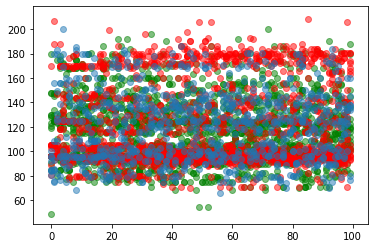

In [95]:
plt.scatter(group_0_audio['rank'], group_0_audio['tempo'], color = 'green', alpha = 0.5)
plt.scatter(group_1_audio['rank'], group_1_audio['tempo'], color = 'red', alpha = 0.5)
plt.scatter(group_2_audio['rank'], group_2_audio['tempo'], alpha = 0.5)